In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from pathlib import Path

def visualize_vertical_logmels(logmel_dir: str, n: int = 5, square_size: float = 4.0):
    """
    Randomly sample n .npy log-mel files and plot them 
    in a vertical column of square subplots.
    
    Args:
        logmel_dir: path to folder containing your (1,128,128) .npy files
        n: number of spectrograms to display
        square_size: size in inches of each square subplot
    """
    logmel_dir = Path(logmel_dir)
    files = list(logmel_dir.glob("*.npy"))
    if len(files) < n:
        raise ValueError(f"Need at least {n} files, found {len(files)}")

    sample = random.sample(files, n)
    specs  = [np.load(p)[0] for p in sample]  # each is (128,128)

    # Make a figure where each subplot is square_size×square_size inches
    fig, axes = plt.subplots(n, 1, 
                             figsize=(square_size, square_size * n),
                             constrained_layout=True)
    if n == 1:
        axes = [axes]

    for ax, spec, path in zip(axes, specs, sample):
        im = ax.imshow(spec, origin='lower', aspect='equal')  # enforce 1:1
        ax.set_title(path.stem, fontsize=10)
        ax.axis('off')

    # Shared colorbar at the right of all subplots
    fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02)
    plt.show()


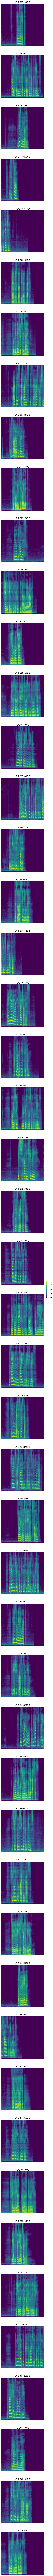

In [2]:
visualize_vertical_logmels(
    "/home/ml/Documents/voice/ResData/log-mel-data",
    n=50
    ,
    square_size=4.0
)